In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [12]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

In [13]:

df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Single Linear Regression


In [14]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)


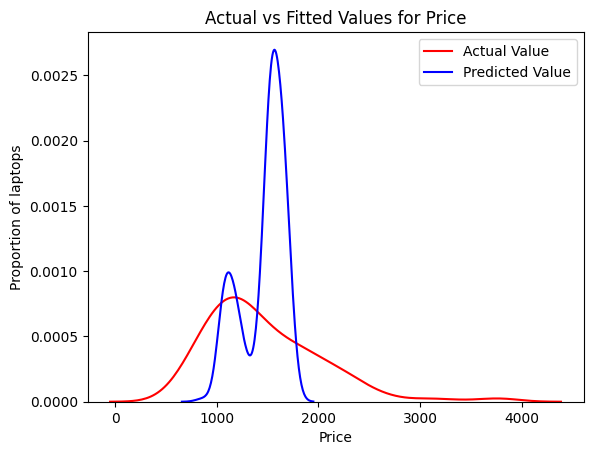

In [15]:

ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()



In [16]:

mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


# Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.


In [17]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)



Text(0, 0.5, 'Proportion of laptops')

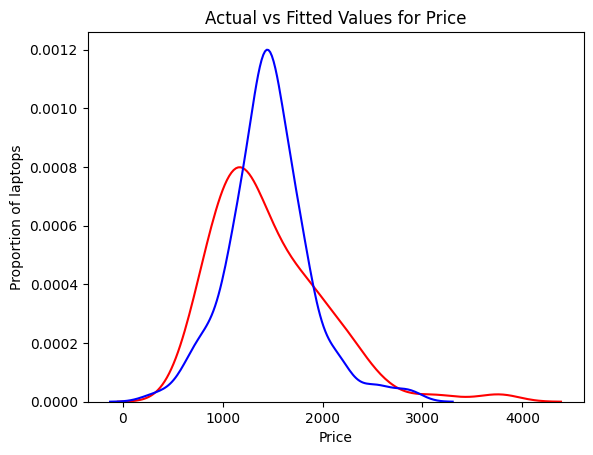

In [18]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')


In [20]:
mse = mean_squared_error(df['Price'],Yhat)
r2 = lm1.score(Z,Y)
print(mse)
print(r2)


284583.4405868629
0.5082509055187374


# Polynomial Regression


In [29]:
X = df[['CPU_frequency']].to_numpy().flatten()
f3 = np.polyfit(X,Y,3)
p3= np.poly1d(f3)

Text(0, 0.5, 'Price of laptops')

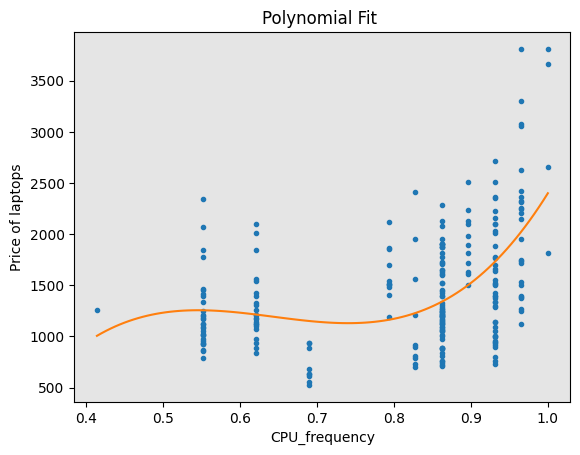

In [30]:
x_new = np.linspace(X.min(),X.max(),100)
y_new = p3(x_new)

plt.plot(X,Y, '.', x_new, y_new, '-')
plt.title(f'Polynomial Fit ')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('CPU_frequency')
plt.ylabel('Price of laptops')

In [31]:

r2 = r2_score(Y,p3(X))
print('The R-square value for 3rd degree polynomial is: ', r2)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))

The R-square value for 3rd degree polynomial is:  0.26692640796531175
The MSE value for 3rd degree polynomial is:  241024.86303848747


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|--!>


##Create Data Processing Pipeline

In [37]:
X_pipe = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Y_pipe = df['Price']

Input = [('scaler', StandardScaler()), ('poly', PolynomialFeatures(include_bias=False, degree=2)), ('model', LinearRegression())]

pipe = Pipeline(Input)

print("Dataframes X_pipe and Y_pipe created and pipeline defined.")

Dataframes X_pipe and Y_pipe created and pipeline defined.


In [38]:
pipe.fit(X_pipe, Y_pipe)
ypipe = pipe.predict(X_pipe)
print("Pipeline fitted and predictions generated.")

Pipeline fitted and predictions generated.


In [39]:
mse_pipe = mean_squared_error(Y_pipe, ypipe)
r2_pipe = pipe.score(X_pipe, Y_pipe)

print(f"Mean Squared Error (Pipeline): {mse_pipe}")
print(f"R-squared (Pipeline): {r2_pipe}")

Mean Squared Error (Pipeline): 120595.8612802837
R-squared (Pipeline): 0.6332094535859659


In [40]:
mse_mlr = mean_squared_error(Y, Y_hat)
print(f"Corrected Mean Squared Error (MLR): {mse_mlr}")

Corrected Mean Squared Error (MLR): 161680.57263893107
